In [46]:
import random
import time

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx

# Якийсь текст і + латех

In [65]:
class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = []
        self.adjacency_matrix = []
        self.adjacency_list = {}

    def add_vertex(self, node):
        if node not in self.nodes:
            self.nodes.add(node)

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            if not self.is_cyclic_with_edge(node1, node2):
                self.edges.append((node1, node2))
        else:
            print('One or both of the nodes are not in the graph')

    def is_cyclic_with_edge(self, node1, node2):
        visited = set()
        stack = [(node1, -1)]

        while stack:
            node, parent = stack.pop()
            if node in visited:
                return True
            visited.add(node)
            for neighbor in self.get_neighbors(node):
                if neighbor != parent:
                    stack.append((neighbor, node))
        return False

    def get_neighbors(self, node):
        neighbours = []
        if node not in self.nodes:
            raise Exception('Node not in graph')
        for edge in self.edges:
            if node == edge[0]:
                neighbours.append(edge[1])
        return neighbours

    def create_adjacency_matrix(self):
        
        nodes_list = list(self.nodes)
        matrix = [[0 for _ in range(len(nodes_list))] for _ in range(len(nodes_list))]
        for edge in self.edges:
            i = nodes_list.index(edge[0])
            j = nodes_list.index(edge[1])
            matrix[i][j] = 1
        self.adjacency_matrix = matrix
    
    def create_adjacency_list(self):
        adjacency_list = {}
        for node in self.nodes:
            adjacency_list[node] = self.get_neighbors(node)
        self.adjacency_list = adjacency_list
        
    def generate_random_graph(self, vertex_count, probability):
        if probability < 0 or probability > 1:
            raise ValueError('Probability must be on [0, 1]')

        for i in range(vertex_count):
            self.add_vertex(i)

        nodes_in_order = list(range(vertex_count))
        random.shuffle(nodes_in_order)

        #progress_bar = tqdm(total=vertex_count, position=0, leave=True) # turn on if you want to see progessbar of generetion

        for i in range(vertex_count):
            for j in range(i + 1, vertex_count):
                if random.random() < probability and nodes_in_order[i] != nodes_in_order[j]:
                    self.add_edge(nodes_in_order[i], nodes_in_order[j])
            #progress_bar.update(1)

        #progress_bar.close()
        self.create_adjacency_matrix()
        self.create_adjacency_list()
        

    
        
    def topological_sort(self):
        result = []
        no_incoming_edges = [node for node in self.nodes if not any(node == edge[1] for edge in self.edges)]

        while no_incoming_edges:
            node = no_incoming_edges.pop(0)
            result.append(node)
            self.remove_node(node)
            no_incoming_edges = [node for node in self.nodes if not any(node == edge[1] for edge in self.edges)]

        if self.edges:
            print('The graph has cycles, topological sorting is not possible.')
            return None

        return result
    
    def topological_sort_matrix(self):
        in_degree = {node: 0 for node in range(len(self.adjacency_matrix))}

        for row in self.adjacency_matrix:
            for col, has_edge in enumerate(row):
                if has_edge:
                    in_degree[col] += 1

        queue = [node for node, degree in in_degree.items() if degree == 0]

        topological_order = []

        while queue:
            node = queue.pop(0)
            topological_order.append(node)

            for neighbor, has_edge in enumerate(self.adjacency_matrix[node]):
                if has_edge:
                    in_degree[neighbor] -= 1
                    if in_degree[neighbor] == 0:
                        queue.append(neighbor)

        if sum(in_degree.values()) != 0:
            return "Cycle detected. Topological sort is not possible."

        return topological_order
        



    def remove_node(self, node):
        self.nodes.remove(node)
        self.edges = [(node1, node2) for node1, node2 in self.edges if node1 != node]

    def visualize(self):
        
        G = nx.DiGraph()
        
        
        for node in self.nodes:
            G.add_node(node)
    
        for edge in self.edges:
            G.add_edge(edge[0], edge[1])
        print(f'Not cycling Graph: {nx.is_directed_acyclic_graph(G)}') # turn on if you want to test // True - acycling
        nx.draw(G, with_labels=True, arrows=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
        plt.show()

    def __str__(self):
        return str((self.nodes, self.edges))


Not cycling Graph: True


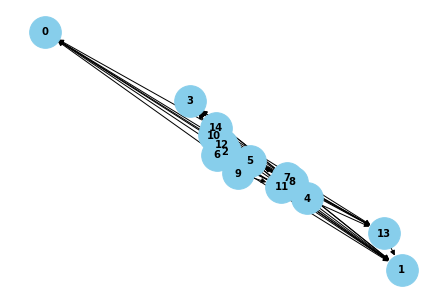

In [78]:
graph = Graph()

graph.generate_random_graph(15, 0.5)
graph.visualize()

In [79]:
graph.topological_sort_matrix()

[7, 8, 2, 4, 10, 9, 5, 11, 12, 6, 3, 14, 0, 13, 1]

In [80]:
graph.topological_sort()

[7, 2, 8, 4, 10, 9, 5, 11, 6, 12, 3, 14, 0, 13, 1]

# Tests

In [66]:
probability = [0.1, 0.3, 0.5, 0.7, 0.9]
size = [20, 30, 40, 50, 60, 70, 80, 90, 100, 120]

In [67]:
import pandas as pd

In [68]:
data = []

In [84]:
total_iterations = len(size) * len(probability) * 20
with tqdm(total=total_iterations, position=0, leave=True) as pbar:  
    for s in size:
        for prob in probability:
            for i in range(20):
                graph = Graph()
                graph.generate_random_graph(s, prob)
                start_time = time.time()
                graph.topological_sort_matrix()
                end_time = time.time()
                result = end_time - start_time
                data.append({'size': s, 'density': prob, 'time': result})

                pbar.update(1)


100%|███████████████████████████████████████████████████████████████| 1000/1000 [14:19<00:00,  1.16it/s]


In [85]:
df = pd.DataFrame(data)

In [86]:
df.shape

(1050, 3)

In [87]:
df

,size,density,time
0,20,0.1,0.000104
1,20,0.3,0.000116
2,20,0.5,0.000083
3,20,0.7,0.000112
4,20,0.9,0.000113
...,...,...,...
1045,120,0.9,0.001142
1046,120,0.9,0.001151
1047,120,0.9,0.001148
1048,120,0.9,0.001154


In [90]:
df.to_csv('output.csv')